<a href="https://colab.research.google.com/github/Irfann24/TugasMachineLearning/blob/main/Tugas_Pertemuan_3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Emisi CO2 dari Kendaraan Bermotor di Kanada dalam Rentang 7 Tahun
*Sumber: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?select=CO2+Emissions_Canada.csv*

In [ ]:
import pandas as pd
dataset = "/content/CO2 Emissions_Canada.csv"

data = pd.read_csv(dataset)
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


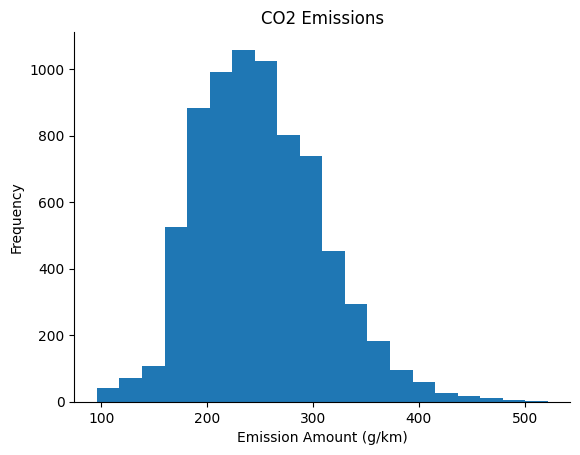

In [ ]:
from matplotlib import pyplot as plt
data['CO2 Emissions(g/km)'].plot(kind='hist', bins=20, title='CO2 Emissions')
plt.xlabel('Emission Amount (g/km)')
plt.gca().spines[['top', 'right',]].set_visible(False)

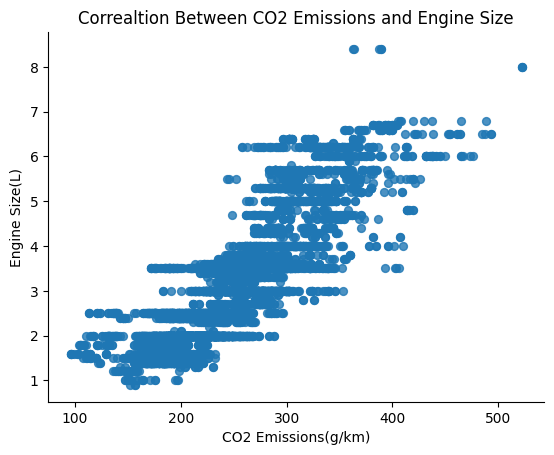

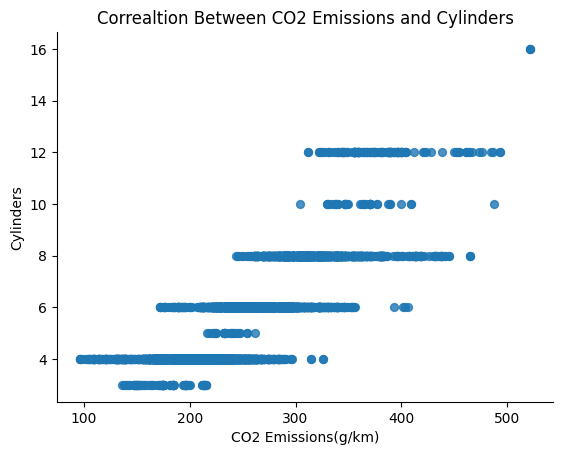

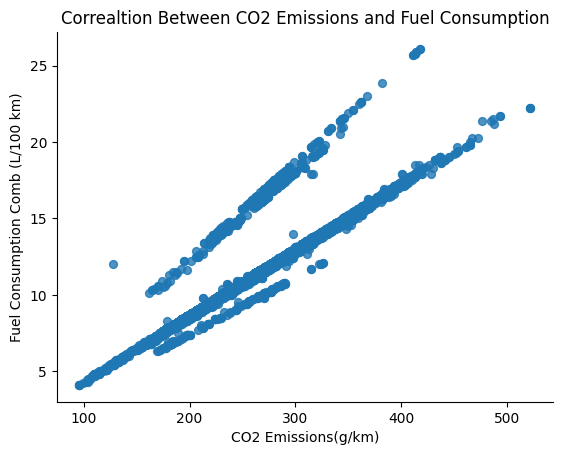

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='CO2 Emissions(g/km)', y='Engine Size(L)', s=32, alpha=.8)
plt.title('Correaltion Between CO2 Emissions and Engine Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='CO2 Emissions(g/km)', y='Cylinders', s=32, alpha=.8)
plt.title('Correaltion Between CO2 Emissions and Cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='CO2 Emissions(g/km)', y='Fuel Consumption Comb (L/100 km)', s=32, alpha=.8)
plt.title('Correaltion Between CO2 Emissions and Fuel Consumption')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Informasi Mengenai Histogram dan *Scatter Plot* di Atas

In [ ]:
print(data['CO2 Emissions(g/km)'].describe())

q1 = data['CO2 Emissions(g/km)'].quantile(0.25)
q3 = data['CO2 Emissions(g/km)'].quantile(0.75)
iqr = q3 - q1
print('Interquartile Range =', iqr)

from scipy.stats import kurtosis, skew
data_kurtosis = kurtosis(data['CO2 Emissions(g/km)'])
data_skewness = skew(data['CO2 Emissions(g/km)'])

print("Kurtosis:", data_kurtosis)
print("Skewness:", data_skewness)

datacorr = data.loc[:,'Engine Size(L)':].corr()
datacorremission = datacorr.iloc[:,6:]
print('Korelasi data Emisi CO2 dengan data lainnya:')
print(datacorremission)

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64
Interquartile Range = 80.0
Kurtosis: 0.4776643928905786
Skewness: 0.5259869435378954
Korelasi data Emisi CO2 dengan data lainnya:
                                  CO2 Emissions(g/km)
Engine Size(L)                               0.851145
Cylinders                                    0.832644
Fuel Consumption City (L/100 km)             0.919592
Fuel Consumption Hwy (L/100 km)              0.883536
Fuel Consumption Comb (L/100 km)             0.918052
Fuel Consumption Comb (mpg)                 -0.907426
CO2 Emissions(g/km)                          1.000000


<ipython-input-13-a017669f275a>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr = data.loc[:,'Engine Size(L)':].corr()


#Pembahasan Data

Berdasarkan hasil statistika deskriptif dan histogram yang disajikan, terlihat bahwa dalam waktu 7 tahun kendaraan bermotor di Kanada menghasilkan emisi CO2 dari rentang 96 g/km sampai dengan 522 g/km.
Dengan melihat persebaran data di histogram dan diperkuat dengan nilai kemencengan (*skewness*) yang positif, diketahui bahwa persebaran data tergolong menceng ke kanan.
Nilai kuartil Q1, Q2, dan Q3, serta mean dari data juga menunjukkan kalau suatu kendaraan bermotor di Kanada yang dipakai selama 7 tahun umumnya menghasilkan emisi CO2 pada rentang 200 g/km sampai dengan 300 g/km.
Korelasi tinggi antara data emisi CO2 dengan data-data yang berkaitan dengan kondisi kendaraan yang diamati menandakan bahwa karakteristik kendaraan memengaruhi besar kecil emisi CO2 yang dihasilkan. Karakteristik yang dimaksud antara lain ukuran mesin, jumlah silinder yang digunakan, dan jumlah bahan bakar yang dihabiskan. Dikarenakan korelasinya bernilai positif, maka emisi CO2 yang banyak dari suatu kendaraan diakibatkan oleh ukuran mesin yang besar, jumlah silinder dalam mesin yang banyak, serta banyaknya bahan bakar yang habis terpakai. Sebaliknya, emisi CO2 yang sedikit disebabkan oleh mesin yang berukuran kecil, sedikitnya silinder di dalam mesin, dan iritnya pemakaian bahan bakar.